## Scrapping Park n Shop data

In [1]:
from selenium import webdriver
import re
import pandas as pd
import os
import urllib.request
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
import matplotlib.pyplot as plt
#import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import requests
import base64
from IPython.core.display import HTML
import pickle
from tqdm import tqdm

In [2]:
pd.set_option('display.max_colwidth', 30)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [3]:
def display_an_image(src):
    response = requests.get(src)
    img = Image.open(BytesIO(response.content))
    return img.resize((100,100))

In [4]:
url = 'https://www.parknshop.com/en/'

In [5]:
option = Options()
option.headless = False
driver = webdriver.Chrome(options=option)

In [6]:
driver.get(url)

In [7]:
action = ActionChains(driver)

In [8]:
webElem = driver.find_elements(By.CLASS_NAME, "nav-item")

In [9]:
lvl0 = [(x.text, x.get_attribute('href')) for x in webElem]
lvl0

[('Food & Beverages', 'https://www.parknshop.com/en/foodBeverages'),
 ('Baby & Mum', 'https://www.parknshop.com/en/babyMum'),
 ('Personal Care & Health', 'https://www.parknshop.com/en/personalCareHealth'),
 ('Houseware', 'https://www.parknshop.com/en/houseWare'),
 ('Pet Care', 'https://www.parknshop.com/en/petCare'),
 ('Xmas super deals', 'https://www.parknshop.com/en/promo/Xmas')]

In [10]:
action.move_to_element(webElem[0]).perform()
webElem1 = driver.find_elements(By.CLASS_NAME, "subCategorylv1")

In [11]:
webElem1[1].text

'Alcoholic Drink'

In [13]:
lvl1 = {}
for i in range(len(lvl0)):
    action.move_to_element(webElem[i]).perform()
    webElem1 = driver.find_elements(By.CLASS_NAME, "subCategorylv1")
    lvl1[lvl0[i][0]] = [(x.text, x.get_attribute('href'), x) for x in webElem1 if len(x.text)>0]

In [14]:
lvl1['Pet Care']

[('Cat Care',
  'https://www.parknshop.com/en/cat-care/lc/08010000',
  <selenium.webdriver.remote.webelement.WebElement (session="007e04e2f8fe1b32f7f52a408e7d35e4", element="802f2584-59a1-4055-91eb-f5502de80e53")>),
 ('Dog Care',
  'https://www.parknshop.com/en/dog-care/lc/08020000',
  <selenium.webdriver.remote.webelement.WebElement (session="007e04e2f8fe1b32f7f52a408e7d35e4", element="1542b662-c3aa-46ab-863d-276c293a0acb")>),
 ('Pet Safe Cleaner',
  'https://www.parknshop.com/en/pet-care/pet-safe-cleaner/c/08040000',
  <selenium.webdriver.remote.webelement.WebElement (session="007e04e2f8fe1b32f7f52a408e7d35e4", element="23e66203-9689-4d0b-b7a5-e1a892667079")>),
 ('Pet Food',
  'https://www.parknshop.com/en/pet-food/lc/08050000',
  <selenium.webdriver.remote.webelement.WebElement (session="007e04e2f8fe1b32f7f52a408e7d35e4", element="4fe02170-9057-4fe4-b390-1fb23640af33")>),
 ('Pet Supplies',
  'https://www.parknshop.com/en/pet-care/pet-supplies/c/08060000',
  <selenium.webdriver.remot

In [15]:
lvl0_names = list(lvl1.keys())
lvl0_names

['Food & Beverages',
 'Baby & Mum',
 'Personal Care & Health',
 'Houseware',
 'Pet Care',
 'Xmas super deals']

In [21]:
lvl2 = {}
for k in range(len(lvl1)):
    action.move_to_element(webElem[k]).perform()
    webElem1 = driver.find_elements(By.CLASS_NAME, "subCategorylv1")
    for i in range(len(lvl1[lvl0_names[k]])):
        wE = lvl1[lvl0_names[k]][i]
        action.move_to_element(wE[2]).perform()
        webElem2 = driver.find_elements(By.CLASS_NAME, "subcategory-item")
        lvl2[wE[0]] = [(x.text, x.get_attribute('href')) for x in webElem2 if len(x.text) > 0]

In [17]:
lvl2['Beverages']

[('Water', 'https://www.parknshop.com/en/food-beverages/water/c/04010100'),
 ('Carbonated Drink',
  'https://www.parknshop.com/en/food-beverages/carbonated-drink/c/04010200'),
 ('Instant Tea/ Coffee/ Milk Tea',
  'https://www.parknshop.com/en/food-beverages/instant-tea-coffee-milk-tea/c/04010300'),
 ('Milk & Yogurt',
  'https://www.parknshop.com/en/food-beverages/milk-yogurt/c/04010400'),
 ('Plant Based & Soy Milk',
  'https://www.parknshop.com/en/food-beverages/plant-based-soy-milk/c/04010500'),
 ('Hot Drink & Mix Powder',
  'https://www.parknshop.com/en/food-beverages/hot-drink-mix-powder/c/04010600'),
 ('Juice & Coconut Water',
  'https://www.parknshop.com/en/food-beverages/juice-coconut-water/c/04010700'),
 ('Energy Drink',
  'https://www.parknshop.com/en/food-beverages/energy-drink/c/04010800'),
 ('Herbal & Healthy Drink',
  'https://www.parknshop.com/en/food-beverages/herbal-healthy-drink/c/04010900'),
 ('Case Offer',
  'https://www.parknshop.com/en/food-beverages/case-offer/c/04

In [18]:
lvl2['Dog Care']

[('Dog Food', 'https://www.parknshop.com/en/pet-care/dog-food/c/08020100'),
 ('Dog Pad & Diaper',
  'https://www.parknshop.com/en/pet-care/dog-pad-diaper/c/08020200'),
 ('Dog Toy & Accessories',
  'https://www.parknshop.com/en/pet-care/dog-toy-accessories/c/08020300'),
 ('Dog Healthcare',
  'https://www.parknshop.com/en/pet-care/dog-healthcare/c/08020400')]

In [19]:
lvl2['Pet Food']

[('Case Offer', 'https://www.parknshop.com/en/pet-care/case-offer/c/08050001')]

In [22]:
lvl2['Baby Milk Formula']

[('Stage 1', 'https://www.parknshop.com/en/baby-mum/stage-1/c/06010100'),
 ('Stage 2', 'https://www.parknshop.com/en/baby-mum/stage-2/c/06010200'),
 ('Stage 3', 'https://www.parknshop.com/en/baby-mum/stage-3/c/06010300'),
 ('Stage 4', 'https://www.parknshop.com/en/baby-mum/stage-4/c/06010400'),
 ('Stage 5', 'https://www.parknshop.com/en/baby-mum/stage-5/c/06010500'),
 ('Special Formula',
  'https://www.parknshop.com/en/baby-mum/special-formula/c/06010600')]

In [23]:
products = list(lvl2.keys())
products

['Beverages',
 'Alcoholic Drink',
 'Pre-Order & Catering',
 'Grocery',
 'Canned, Preserved & Dried Food',
 'Condiment, Sauce & Soup',
 'Snack & Dessert',
 'Chilled/ Frozen Food',
 'Fruit & Vegetable',
 'Breakfast & Jam',
 'Baby Milk Formula',
 'Baby Diaper & Pant',
 'Baby Food',
 'Baby Care',
 'Other Baby Needs',
 'Toilet Roll & Tissue',
 'Household Cleaner',
 'Kitchen Cleaner',
 'Bathroom Cleaner',
 'Laundry',
 'Kitchenware & Tableware',
 'Home Appliance',
 'Houseware & Party Supplies',
 'Outdoor & Gardenware',
 'Home Care',
 'Cat Care',
 'Dog Care',
 'Pet Safe Cleaner',
 'Pet Food',
 'Pet Supplies']

In [34]:
products[16]

'Household Cleaner'

In [35]:
productInfo = []
for p in products[:10]:
    y = lvl2[p]
    for x in y:
        nm = x[0]
        lk = x[1]
        driver.get(lk)
        try:
            s = driver.find_element(By.CLASS_NAME,'product-quantity').text
            s = s.split('Products')[0]
            s = int(s.strip())
            s = int(s/15) + 2
        except:
            s = 10
        for _ in range(0, s):
            driver.execute_script("window.scrollTo(0, 50000);")
            time.sleep(2)
        pinfo = driver.find_elements(By.CLASS_NAME, "productInfo")
        pinfo = [t.text for t in pinfo]
        pinfo = [t.split('\n') for t in pinfo]
        pphoto = driver.find_elements(By.XPATH, "//*/div[@class='productTitle']/a/e2-product-thumbnail/e2-media/img")
        pphoto = [t.get_attribute('src') for t in pphoto]
        S = list(zip(pinfo,pphoto))
        SS = [(*x,y) for x,y in S]
        productInfo.extend(SS)
        time.sleep(5)

KeyboardInterrupt: 

In [52]:
productInfo[:10]

[('WATSONS DISTILLED WATER',
  '430ML',
  '$5.00',
  'https://api.parknshop.com/medias/DISTILLED-WATER-BP-152058.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3w5NjY3NXxpbWFnZS9qcGVnfGgxYi9oYWIvOTMzNjc2NzY3NjQ0Ni9ESVNUSUxMRUQgV0FURVItQlBfMTUyMDU4LmpwZ3wyOGI1ZDgxMWRjZmRhYTZlNTEwZDU1ZTNjNjQyMGJiYTllMzljZTkyODA0YTk2OTJlMzhiYjk2NWJiZjI0OGM0'),
 ('WATSONS DISTILLED WATER',
  '1.25L',
  '$10.00',
  'https://api.parknshop.com/medias/DISTILLED-WATER-BP-155446.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3w5MjY4OXxpbWFnZS9qcGVnfGhlZC9oZmMvOTMzNjg1NzQ2MDc2Ni9ESVNUSUxMRUQgV0FURVItQlBfMTU1NDQ2LmpwZ3xlM2U4NzZiMjEwMjU5MTZlNDQ1ZGRjNmYxYjIyZDFjMDMzYzljYjM3MTcyZDIyMDlmYjVjMTg0MWU3MTE5MmUz'),
 ('WATSONS DISTILLED WATER',
  '1.8L',
  '$9.90',
  '$12.00',
  'https://api.parknshop.com/medias/DISTILLED-WATER-BP-120420.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3w5NjQ1MHxpbWFnZS9qcGVnfGgxYi9oMmUvOTMzNjg5NzA0NDUxMC9ESVNUSUxMRUQgV0FURVItQlBfMTIwNDIwLmpwZ3w0ZmRhMTQ1Y2RjOWNjNWZmMDgyN2NmYWFhN2VlZjE3NjgzM2Y4OTFjNzcwMzA4N2EyMzY5MGQzN2Q0Y

In [53]:
productInfo[-10:]

[('Promotion',
  'CESAR JAP BEEF CHICK & VEG (CASE)',
  '24X100G',
  '$203.00',
  'https://api.parknshop.com/medias/JAP-BEEF-CHICK-VEG-CASE-BP-417511.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3wzMjk5MHxpbWFnZS9qcGVnfGhlZi9oYTEvOTM0MDc3MTA3NDA3OC9KQVAgQkVFRiBDSElDSyAgVkVHIENBU0UtQlBfNDE3NTExLmpwZ3w3NGFkZjYyMTdkMjg5YjhkMzk4ODEyNTE3MTAzZWU5YzgyNGQ3N2QzNTQ1MmU1ZjAyMjVlMTcyM2FlMjBjYzk1'),
 ('Promotion',
  'CESAR JAP CESAR BEEF & CHEESE (CASE)',
  '24X100G',
  '$203.00',
  'https://api.parknshop.com/medias/JAP-CESAR-BEEF-CHEESE-CASE-BP-417514.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3wzMjUzNnxpbWFnZS9qcGVnfGg2OS9oNTkvOTM0MDg2OTUwOTE1MC9KQVAgQ0VTQVIgQkVFRiAgQ0hFRVNFIENBU0UtQlBfNDE3NTE0LmpwZ3xjMWM1ZWQ0Y2Q3YTIwNThkNzRmNmNkNTRlMjUwMmYzZjdlNmM4YWJkNjBkYWNkZWNhYjQ2ZDIyYWM5MmY2NDQ2'),
 ('Promotion',
  'CESAR LAMB W/ROSEMARY&BROCCOLI (CAS',
  '24X100G',
  '$203.00',
  'https://api.parknshop.com/medias/LAMB-WROSEMARYBROCCOLI-CASE-BP-417517.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3wzMjcyMXxpbWFnZS9qcGVnfGgyYi9oMT

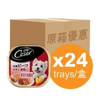

In [54]:
display_an_image(productInfo[-10][-1])

In [55]:
def processing_a_rec(a_rec):
    photo = a_rec[-1]
    if a_rec[-3][0]=='$':
        discount_price = a_rec[-3]
        unit_price = a_rec[-2]
        ri = 3
    else:
        unit_price = a_rec[-2]
        discount_price = ''
        ri = 2
    unit = a_rec[-(ri+1)]
    item = a_rec[-(ri+2)]
    if len(a_rec) > ri+2:
        if a_rec[-(ri+3)][0] == '$':
            bulk_price = a_rec[-(ri+3)]
        else:
            bulk_price = ''
    else:
        bulk_price = ''
    return item, unit, unit_price, discount_price, bulk_price, photo

In [56]:
items_df = []
for a_rec in productInfo:
    items_df.append(processing_a_rec(a_rec))

In [57]:
items_df = pd.DataFrame(items_df)
items_df.columns = ['item', 'unit', 'unit_price', 'discount_price', 'bulk_price', 'photo_src']

In [58]:
items_df.tail()

,item,unit,unit_price,discount_price,bulk_price,photo_src
14656,CESAR JAP WHITEFISH WITH V...,24X100G,$203.00,,,https://api.parknshop.com/...
14657,MON PETIT GOLD CAT GOLD TU...,24X85G,$228.00,,,https://api.parknshop.com/...
14658,N1 NATUREL CORN SOYA CAT L...,3X17.5L,$300.00,,$480 / 2pcs,https://api.parknshop.com/...
14659,N1 NATUREL CORN SOYA CAT L...,3X17.5L,$300.00,,$480 / 2pcs,https://api.parknshop.com/...
14660,N1 NATUREL 2.0CORN SOYA CA...,3X17.5L,$300.00,,,https://api.parknshop.com/...


In [32]:
cd D:\RMSC5002\Selenium

D:\RMSC5002\Selenium


In [ ]:
pickle.dump(items_df,open('Park_n_Shop_Items_df.obj','wb'))

In [26]:
items_df = pickle.load(open('Park_n_Shop_Items_df.obj','rb'))

In [27]:
items_df.iloc[11150:11160]['photo_src'].tolist()

['https://api.parknshop.com/medias/COLL-MF-FOAM-CLEANSER-BP-256744.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3wxNzQxN3xpbWFnZS9qcGVnfGg2Mi9oMGMvOTM0MTQ0NDY4NTg1NC9DT0xMIE1GIEZPQU0gQ0xFQU5TRVItQlBfMjU2NzQ0LmpwZ3wwY2RjOTMyYjc2NWYwMzU3YTNmMTlmYWJhMTAwYmQ0YmI5MzE3MmNhZWYyNzkxMTg0NjYzZTRjNzVmMjY5MDVl',
 'https://api.parknshop.com/medias/WHITE-REG-REFRESHING-CLEANSER-BP-804333.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3w3MDAxfGltYWdlL2pwZWd8aDI4L2g2OS85MzQxNDc0ODMyNDE0L1dISVRFIFJFRyBSRUZSRVNISU5HIENMRUFOU0VSIC1CUF84MDQzMzMuanBnfDFiYmJlY2FlMWM2ODU0ZThjMDczOTZkMDM1NjI1NmU5ZjA3YTljZWU2YTM1NThlNjg3ZmUxMzcxODc5MTNiMGE',
 'https://api.parknshop.com/medias/DEEP-CLEAN-GENTLE-SCRUB-BP-152834.jpg?context=bWFzdGVyfHBuc2hrL2ltYWdlc3wzMzkyOHxpbWFnZS9qcGVnfGhhNy9oOTkvOTMzNjc2MjYzMDE3NC9ERUVQIENMRUFOIEdFTlRMRSBTQ1JVQi1CUF8xNTI4MzQuanBnfDI1Y2NlOTY3NjMyNWY5ZjQ1Yzg3ODJmMGQzOTgxMTUzZGNhNWFmOGViYzQ4YzU4Mjc5ODc2NzQ2ZGQ0Y2EzNjU',
 'https://api.parknshop.com/medias/DEEP-CLEAN-FACIAL-CLEANSER-BP-141535.jpg?context=bWFzdGVyfH

In [28]:
images_list = pickle.load(open('images_list.obj','rb'))

In [29]:
len(images_list)

11001

In [13]:
images_list2 = []
for sc in tqdm(range(11001,len(items_df.photo_src))):
    if 'api' in items_df.photo_src[sc]:
        try:
            x = display_an_image(items_df.photo_src[sc])
        except:
            x = ''
    else:
        x = ''
    images_list2.append(x)
    if sc % 1000 == 0:
        pickle.dump(images_list2,open(f'images_list2.obj','wb'))

100%|██████████████████████████████████████████████████████████████████████████████| 3945/3945 [16:18<00:00,  4.03it/s]


In [14]:
pickle.dump(images_list2,open(f'images_list2.obj','wb'))

In [33]:
image_list2 = pickle.load(open('image_list2.obj','rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'image_list2.obj'

In [15]:
len(images_list2)

3945

In [20]:
images_list = images_list + images_list2

In [21]:
items_df['photo'] = images_list

,item,unit,unit_price,discount_price,photo
0,WATSONS DISTILLED WATER,430ML,$5.00,,
1,WATSONS DISTILLED WATER,1.25L,$10.00,,
2,WATSONS DISTILLED WATER,1.8L,$12.00,$9.90,
3,WATSONS DISTILLED WATER WITH MINERALS,430ML,$5.00,,
4,WATSONS MINERALISED WATER,800ML,$6.50,,
5,WATSONS MINERALIZED WATER 6S,430MLx6,$21.90,,
6,WATSONS MINERALIZED WATER,4.5L,$22.90,,
7,WATSONS ALKALINE WATER 9.0,1.2L,$13.90,,
8,WATSONS ALKALINE WATER 9.0,420ML,$10.90,$7.50,
9,WATSONS MINERALISED WATER,1.25L,$10.00,,

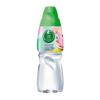
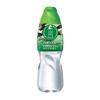
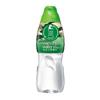
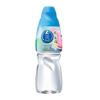
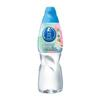
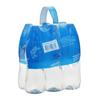
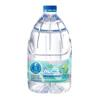
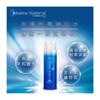
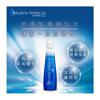
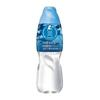

In [31]:
HTML(items_df.iloc[:10][['item','unit','unit_price','discount_price','photo']].to_html(formatters={'photo': image_formatter}, escape=False))

In [32]:
pickle.dump(items_df,open('Park_n_Shop_Items_df_full.obj','wb'))